# Wrangle and Analyze WeRateDogs Twitter Data Project
## Introduction:
This project aims to wrangling tweet archive of Twitter user @dog_rates to create interesting and trustworthy analyses and visualizations.
## Project Content:
1. Data wrangling:
 *  Gathering data 
 *  Assessing data 
 *  Cleaning data 
2. Storing, analyzing, and visualizing the wrangled data.



## Step 1 : Gathering.
#### Data resources: 
1. WeRateDogs Twitter archive 
2. tweet image predictions
3. Twitter API to gather tweets retweet count and favorite.

In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
import requests
import tweepy 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read twitter-archive CSV file.
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
#download image predictions tsv file  programmatically using the Requests library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#read image_predictions.tsv file   
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### I Place two cells below i case if twiiter team replay to me with acceptence of using twitter APIs

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [6]:
#create dataframeand read text file line by line to it
tweets_data = []
with open('tweet-json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
tweets_extra_info = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [7]:
#minimize tweets_extra_info to contain only 3 columns
tweet_rt_fav = tweets_extra_info[['id', 'retweet_count', 'favorite_count']]
 
tweet_rt_fav.head(8)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848


## Step 2 : Assessing.
####  assess data  visually and programmatically for quality and tidiness issues

In [8]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [11]:
sum(twitter_archive_enhanced['tweet_id'].duplicated())

0

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
sum(image_predictions['tweet_id'].duplicated())

0

In [15]:
tweet_rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
tweet_rt_fav.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
sum(tweet_rt_fav['id'].duplicated())

0

### Quality Issues:(not solved all)
- timestamp & retweeted_status_timestamp type in twitter_archive_enhanced should be datetype. 
- tweet_id type in twitter_archive_enhanced should be string 
- p1,p2,p3 in image_predictions table should be renamed to clear meaning 
- wrong names in twitter_archive_enhanced ( like : a , an , the) 
- source column content in twitter_archive_enhanced contain HTML link tags surrounding the text. 
- some tweets are not original tweets "retweets"
- rename id in tweet_rt_fav table to tweet_id and covert it to string
- doggo, floofer, pupper, and puppo columns have values with None instead of NaN
- The rating_numerator column should of type float .
- extraction of ratings of some rows are not correct

- missin rows in tweet_rt_fav and image_predictions.(2 missing row in tweet_rt_fav and 281 missing row in image_predictions ) 
- missing expanded_urls in twitter_archive_enhanced 


### Tideness Issues:
- doggo, floofer, pupper, and puppo column in twitter_archive_enhanced better to be one column with this values (doggo, floofer, pupper, and puppo).
- combine 3 data resources to be one dataset.

## Step 3: Cleaning.

In [18]:
#make copies of 3 dataframes 
twitter_archive =twitter_archive_enhanced.copy()
image_pred =image_predictions.copy()
rt_fav=tweet_rt_fav.copy()

In [19]:
#change timestamp & retweeted_status_timestamp type to datetime
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])
twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive['retweeted_status_timestamp'])


In [20]:
#Seprate the column into 2 columns date and time 
twitter_archive['date'] = twitter_archive['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_archive['time'] = twitter_archive['timestamp'].apply(lambda time: time.strftime('%H:%M'))


In [21]:
#Test
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


In [22]:
#convert rating to float
twitter_archive['rating_numerator'] = twitter_archive['rating_numerator'].astype(float)

In [23]:
#Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [24]:
#change tweet_id type to string
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype(str)
#test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [25]:
image_pred['tweet_id'] = image_pred['tweet_id'].astype(str)

In [26]:
#Correct wrong names 
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Jockson       1
Tyrus         1
Superpup      1
Rey           1
Obie          1
Name: name, Length: 957, dtype: int64

In [27]:
#Change None cells to NaN
twitter_archive['name'].replace('None', np.nan,inplace = True)
#Change a cells to NaN
twitter_archive['name'].replace('a', np.nan,inplace = True)



In [28]:
#change other uncorrect names which they are statrt with lowercase 
twitter_archive.loc[twitter_archive['name'] == twitter_archive['name'].str.lower(), 'name'] = np.nan

In [29]:
twitter_archive['name'].value_counts()

Charlie     12
Oliver      11
Lucy        11
Cooper      11
Tucker      10
            ..
Brockly      1
Jockson      1
Tyrus        1
Superpup     1
Obie         1
Name: name, Length: 931, dtype: int64

In [30]:
#renamin p1,p2,p3 column name 
image_pred.rename(columns={'p1': '1st_prediction', 'p2': '2nd_prediction', 'p3': '3rd_prediction'}, inplace=True)
#test
image_pred.head(0)

,tweet_id,jpg_url,img_num,1st_prediction,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog


In [31]:
#courrect source column contetn in twitter_archive_enhanced table to be without <a> tag 
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [32]:
#replace unclear content with correct content
twitter_archive['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',inplace = True)
twitter_archive['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene',inplace = True)
twitter_archive['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',inplace = True)
twitter_archive['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck',inplace = True)


In [33]:
#Test
twitter_archive['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [34]:
#drop retweets tweets
RT = twitter_archive_enhanced.text.str.match('^RT @')
twitter_archive = twitter_archive[~RT]
#Test
twitter_archive[RT]

C:\Users\noura\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


In [35]:
#test:
print(sum(twitter_archive.retweeted_status_user_id.value_counts()))

0


In [36]:
#rename id column to tweet_id 
rt_fav.rename({'id': 'tweet_id'}, axis=1, inplace=True)
rt_fav['tweet_id'] = rt_fav['tweet_id'].astype(str)

rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [37]:
#change doggo, floofer, pupper, and puppo have values with "None" to NaN
twitter_archive['doggo'].value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

In [38]:
twitter_archive['floofer'].value_counts()

None       2165
floofer      10
Name: floofer, dtype: int64

In [39]:
twitter_archive['pupper'].value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

In [40]:
twitter_archive['puppo'].value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

In [41]:
twitter_archive['doggo'].replace('None', np.nan,inplace = True)
twitter_archive['floofer'].replace('None', np.nan,inplace = True)
twitter_archive['pupper'].replace('None', np.nan,inplace = True)
twitter_archive['puppo'].replace('None', np.nan,inplace = True)

In [42]:
#combine 4 columns into one column
#twitter_archive_enhanced["dog_stage"] = twitter_archive_enhanced["doggo"] + twitter_archive_enhanced["floofer"]+twitter_archive_enhanced["pupper"] + twitter_archive_enhanced["puppo"]
cols = ['doggo', 'floofer', 'pupper','puppo']
twitter_archive["dog_stage"] = twitter_archive[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

In [43]:
twitter_archive.head(16)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,NaN,NaN,08-01-2017,16:23,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,NaN,NaN,NaN,08-01-2017,00:17,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,NaN,NaN,NaN,07-31-2017,00:18,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,NaN,NaN,NaN,07-30-2017,15:58,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,NaN,NaN,NaN,07-29-2017,16:00,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,NaN,NaN,NaN,07-29-2017,00:08,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,NaN,NaN,NaN,07-28-2017,16:27,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,NaN,NaN,NaN,07-28-2017,00:22,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,NaN,NaN,NaN,07-27-2017,16:25,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,NaN,NaN,NaN,07-26-2017,15:59,doggo


In [45]:
#fine decimal rating
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
#there are 5 rows with decimal rating which they are extracted uncorrectly 

C:\Users\noura\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [51]:
twitter_archive.at[0:45, 'rating_numerator']=13.5

In [52]:
twitter_archive.at[0:695, 'rating_numerator']=9.75

In [53]:
twitter_archive.at[0:763, 'rating_numerator']=11.27

In [54]:
twitter_archive.at[0:1689, 'rating_numerator']=9.5

In [55]:
twitter_archive.at[0:1712, 'rating_numerator']=11.26

### Delete unnecessary columns

In [57]:
#from twitter_archive_enhanced table
twitter_archive.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','timestamp','doggo','puppo','floofer','pupper','in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

In [58]:
twitter_archive.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'time', 'dog_stage'],
      dtype='object')

### Combine all 3 dataframes togther.

In [59]:
#combine first two table and combine the result with 3rd table
twitter_archive_master = pd.merge(twitter_archive, image_pred, on ='tweet_id', how= 'inner' )
twitter_archive_master = pd.merge(twitter_archive_master, rt_fav, on = 'tweet_id', how = 'inner' )

In [60]:
twitter_archive_master.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,...,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,11.26,10,Phineas,08-01-2017,16:23,,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


## Storing, Analyzing, and Visualizing Data

In [63]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

#Suggestions by reviewer to avoid writing the row number to CSV File 
#twitter_archive_master.to_csv(twitter_archive_master, index=False)

### Most common dogs stages

In [64]:
twitter_archive_master['dog_stage'].value_counts()

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [65]:
#semms there are we need cleaning again because some values are (doggo,puppo or doggo,floofer or doggo,pupper)
# i will takr fist type only
twitter_archive_master =twitter_archive_master.replace({'dog_stage': {'doggo,pupper': 'doggo', 'doggo,floofer': 'doggo', 'doggo,pupper':'doggo', 'doggo,puppo':'doggo'}})
#test
twitter_archive_master.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [66]:
twitter_archive_master['dog_stage'].value_counts()

           1688
pupper      203
doggo        74
puppo        22
floofer       7
Name: dog_stage, dtype: int64

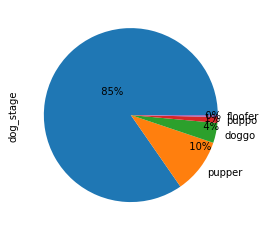

In [67]:
#dog_stage = twitter_archive_master['dog_stage'].value_counts().plot.bar()
twitter_archive_master.dog_stage.value_counts().plot(kind='pie',autopct='%20.0f%%')

### relashionship between retweet&favorite and dog stage

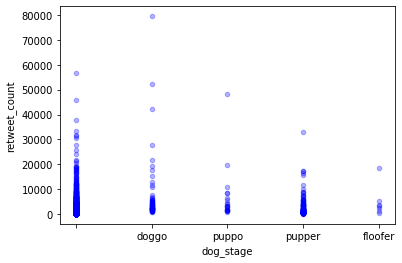

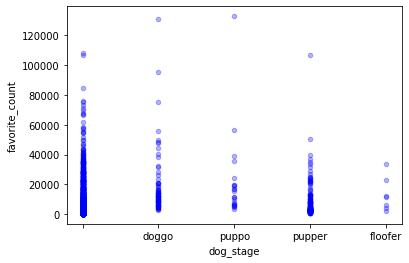

In [68]:
twitter_archive_master.plot(kind = 'scatter', x='dog_stage', y='retweet_count', color='blue', alpha=0.3)
twitter_archive_master.plot(kind = 'scatter', x='dog_stage', y='favorite_count', color='blue', alpha=0.3)

### relashionship between time&date with  rating

<function matplotlib.pyplot.show(*args, **kw)>

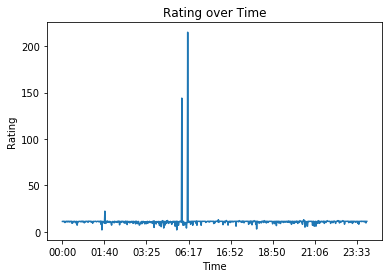

In [69]:
twitter_archive_master.groupby('time')['rating_numerator'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.show

### Famouse dogs names

In [70]:
twitter_archive_master.name.value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
           ..
Tug         1
Siba        1
Staniel     1
River       1
Lucky       1
Name: name, Length: 913, dtype: int64

Text(0.5, 0, 'Number of Dogs')

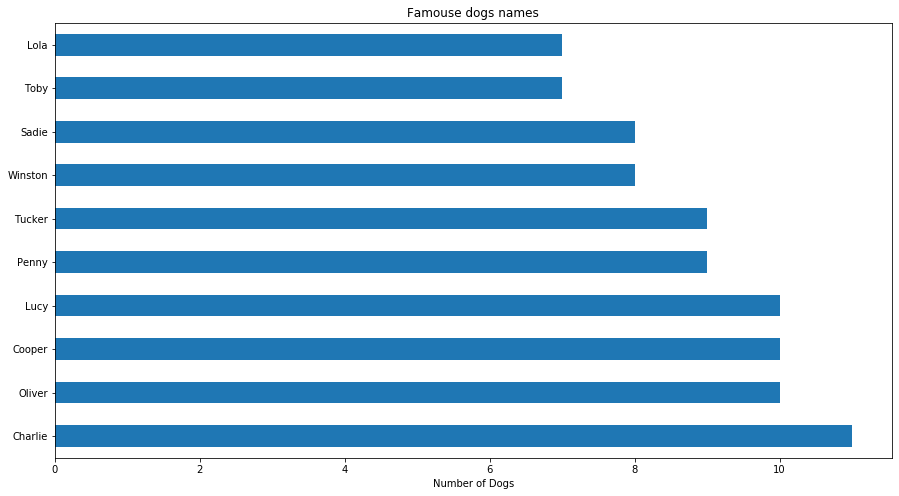

In [71]:
twitter_archive_master.name.value_counts()[0:10].plot(kind='barh', figsize=(15,8), title='Famouse dogs names').set_xlabel("Number of Dogs")


## The image of the dog with the highest and minimum retweet

In [72]:
twitter_archive_master['retweet_count'].describe()

count     1994.000000
mean      2766.753260
std       4674.698447
min         16.000000
25%        624.750000
50%       1359.500000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [73]:
#Higher_rt =twitter_archive_master.query('retweet_count == 79515', inplace = True)  jpg_url
Higher_rt = twitter_archive_master[twitter_archive_master["retweet_count"] == 79515]
Higher_rt.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,...,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog,retweet_count,favorite_count
775,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,11.26,10,NaN,06-18-2016,18:26,doggo,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


In [74]:
Higher_rt['jpg_url']

775    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

The Picture taken from a video 

In [75]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")

In [76]:
#Higher_rt =twitter_archive_master.query('retweet_count == 79515', inplace = True)  jpg_url
min_rt = twitter_archive_master[twitter_archive_master["retweet_count"] == 16]
min_rt.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,...,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog,retweet_count,favorite_count
1977,666102155909144576,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10,NaN,11-16-2015,03:55,,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,16,81


In [77]:
min_rt['jpg_url']

1977    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
Name: jpg_url, dtype: object

In [78]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg")

## The image of the dog with the highest & minmum favorite

In [79]:
twitter_archive_master['favorite_count'].describe()

count      1994.000000
mean       8895.725677
std       12213.193181
min          81.000000
25%        1982.000000
50%        4136.000000
75%       11308.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [80]:
Higher_fav = twitter_archive_master[twitter_archive_master["favorite_count"] == 131075]
Higher_fav.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,...,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog,retweet_count,favorite_count
775,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,11.26,10,NaN,06-18-2016,18:26,doggo,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


In [81]:
Higher_fav['jpg_url']

775    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

In [82]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")

In [83]:
min_fav = twitter_archive_master[twitter_archive_master["favorite_count"] == 81]
min_fav.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,...,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog,retweet_count,favorite_count
1977,666102155909144576,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10,NaN,11-16-2015,03:55,,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,16,81


In [84]:
min_fav['jpg_url']

1977    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
Name: jpg_url, dtype: object

In [85]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg")

## Conclusions:
After The wrangling and analysis process i fond some results:
- 85% of tweets users not writing the dog stage, but the results shows the pupper type is the most popular type.
- The most common dogs name is Charlie then Lucy, Oliver ,Cooper In second place.
- Doggo and Pupper type They get the highest retweet and favorite.
- Tweets in Approximately time 6:00 get more rating.
- the image of the dog with the highest favorite and retweet is the same dog and it's a doggo type.
- the image of the dog with the lowest favorite and retweet is the same dog.

# Refrence:
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html
- https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none
- https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o